In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [2]:
import sklearn

sklearn.__version__

'1.3.2'

In [2]:
# Loading the dataset
data = pd.read_csv("/media/danlof/dan files/data_science_codes/Project_3/deployment/Language_Detection.csv")
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [15]:
# value count for each language
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [16]:
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [17]:
# converting categorical variables to numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
le.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

## Text processing

In [19]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'\[\]', ' ', text)
    text = text.lower()
    data_list.append(text)

## Train and test sets splitting

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Bag of words

In [21]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(X_train)

x_train= cv.transform(X_train).toarray()
x_test = cv.transform(X_test).toarray()

## model creation and prediction

- MultinomialNB is commonly used in various text classification tasks, including spam detection, sentiment analysis, topic classification, and more.
- It is particularly efficient and works well when dealing with high-dimensional, sparse data, such as text data represented as bag-of-words or term frequency-inverse document frequency (TF-IDF) vectors

In [22]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

### prediction

In [23]:
y_pred = model.predict(x_test)

## Optional(Pipeline)

- Use it after the train and test spliting the dataset, skip the above 2 cells
- pipelines are important when we want to avoid errors and it also makes it easy to track code, reasuability of code, avoid leakages etc

In [24]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('vectorizer',cv),('multinomialNB',model)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

## Evaluating the model

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)


### 1. Accuracy score

In [27]:
y_pred2 = pipe.predict(X_test)
ac2 = accuracy_score(y_test,y_pred2)
ac2

0.9782398452611218

### 2. Classification report 

In [28]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       1.00      0.94      0.97        80
           2       1.00      0.96      0.98       114
           3       0.89      1.00      0.94       264
           4       0.99      0.99      0.99       206
           5       1.00      1.00      1.00        92
           6       1.00      0.96      0.98        77
           7       1.00      0.89      0.94         9
           8       0.99      0.99      0.99       137
           9       1.00      0.96      0.98        74
          10       1.00      0.99      1.00       130
          11       0.98      0.98      0.98       151
          12       0.99      0.95      0.97       132
          13       0.99      0.98      0.98       153
          14       0.99      0.99      0.99       138
          15       1.00      1.00      1.00        86
          16       1.00      0.93      0.96       107

    accuracy              

### 3. Confusion matrix

<Axes: >

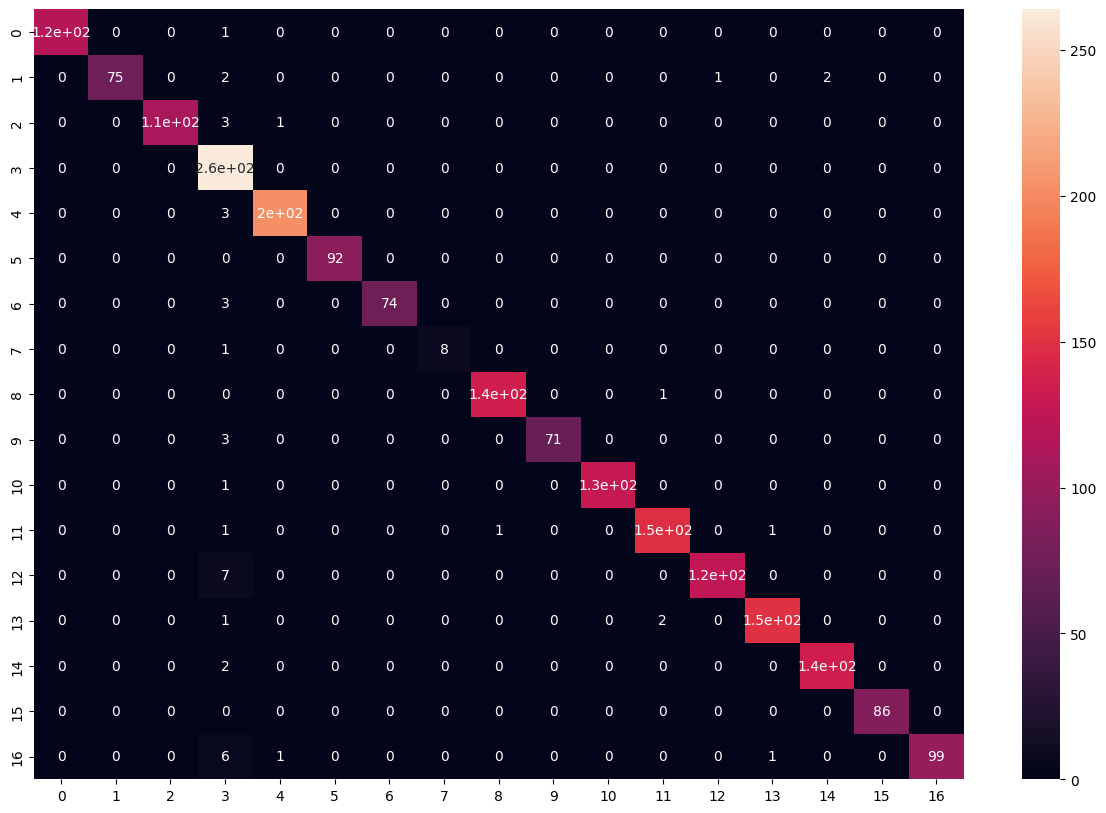

In [29]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)

## Saving the model

In [31]:
# saving cv and the model

with open('trained_pipeline-0.1.0.pkl','wb') as f:
    pickle.dump(pipe,f)

### Test the model

In [36]:
text = 'Bella ciao'
y=pipe.predict([text])
le.classes_[y[0]],y

('Italian', array([8]))

- Incase you what to reuse the contervector and the model above in future,run the code below

In [ ]:
#import pickle

# Load the CountVectorizer
#with open("transform.pkl", "rb") as transform_file:
    #loaded_cv = pickle.load(transform_file)

# Load the model
#with open("model.pkl", "rb") as model_file:
    #loaded_model = pickle.load(model_file)
